#1. BUSINESS UNDERSTANDING
    
    Human immunodeficiency virus (HIV) adalah virus yang menyerang sistem kekebalan tubuh. Acquired immunodeficiency syndrome (AIDS) terjadi pada tahap infeksi yang paling lanjut. HIV menyerang sel darah putih tubuh, sehingga melemahkan sistem kekebalan tubuh. Hal ini membuat orang lebih mudah terserang penyakit seperti TBC, infeksi, dan beberapa jenis kanker.
    HIV menyebar dari cairan tubuh orang yang terinfeksi, termasuk darah, air susu ibu, air mani, dan cairan vagina. HIV tidak menyebar melalui ciuman, pelukan, atau berbagi makanan. HIV juga dapat menyebar dari ibu ke bayinya.
    HIV dapat dicegah dan diobati dengan terapi antiretroviral (ART). HIV yang tidak diobati dapat berkembang menjadi AIDS, seringkali setelah bertahun-tahun.
    WHO kini mendefinisikan Penyakit HIV Lanjut (AHD) sebagai jumlah sel CD4 kurang dari 200 sel/mm3 atau stadium 3 atau 4 WHO pada orang dewasa dan remaja. Semua anak di bawah usia 5 tahun yang hidup dengan HIV dianggap memiliki penyakit HIV lanjut.


#2. DATA UNDERSTANDING#

In [48]:
#import library yang dibutuhkan
import pandas as pd #untuk pengolahan tabel
import numpy as np #untuk pengolahan data array

#Visualisasi
import matplotlib.pyplot as plt #untuk visualisasi grafik
import seaborn as sns #untuk visualisasi grafik
import scipy.stats as scp
import missingno as msno #untuk visualisasi missing value

# Machine Learning
from sklearn.preprocessing import LabelEncoder, Normalizer, StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA  # Analisis komponen utama
from wordcloud import WordCloud #Membuat grafik wordcloud
from sklearn.cluster import KMeans  # Clustering dengan K-Means
from sklearn.datasets import make_blobs

# Atur gaya visualisasi
sns.set(style="whitegrid")

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, roc_auc_score, roc_curve
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [49]:
#untuk mengupload file
from google.colab import files
files.upload()

Saving HIV.csv to HIV (2).csv


{'HIV (2).csv': b'Umur;Jenis Kelamin;Kecamatan;Kelurahan;Tahun Register;Status ODHIV\r\n45;Laki-laki;Pasar Kemis;Sukamantri;2023;Meninggal\r\n17;Perempuan;Pasar Kemis;Pangadegan;2020;Gagal follow up\r\n37;Laki-laki;Pasar Kemis;Pangadegan;2021;ODHIV sedang pengobatan\r\n28;Perempuan;Pasar Kemis;Pangadegan;2021;ODHIV sedang pengobatan\r\n39;Laki-laki;Rajeg;Sukamanah;2021;ODHIV sedang pengobatan\r\n30;Laki-laki;Pasar Kemis;Sukaasih;2021;ODHIV sedang pengobatan\r\n50;Laki-laki;Pasar Kemis;Sukamantri;2021;ODHIV sedang pengobatan\r\n29;Laki-laki;Pasar Kemis;Sukamantri;2021;Meninggal\r\n27;Laki-laki;Pasar Kemis;Pangadegan;2021;Meninggal\r\n29;Laki-laki;Periuk;Periuk;2021;ODHIV sedang pengobatan\r\n28;Laki-laki;Pasar Kemis;Pasar Kemis;2021;ODHIV sedang pengobatan\r\n52;Laki-laki;Pasar Kemis;Kutabumi;2022;Meninggal\r\n41;Perempuan;Pasar Kemis;Sukaasih;2022;ODHIV sedang pengobatan\r\n35;Laki-laki;Padas;Kedungprahu;2022;Gagal follow up\r\n26;Laki-laki;Pasar Kemis;Pasar Kemis;2022;ODHIV sedang pen

In [50]:
#Membuat variabel untuk menyimpan nilai berupa file csv
df = pd.read_csv('HIV.csv', delimiter=';')

In [51]:
df.head()

,Umur,Jenis Kelamin,Kecamatan,Kelurahan,Tahun Register,Status ODHIV
0,45,Laki-laki,Pasar Kemis,Sukamantri,2023,Meninggal
1,17,Perempuan,Pasar Kemis,Pangadegan,2020,Gagal follow up
2,37,Laki-laki,Pasar Kemis,Pangadegan,2021,ODHIV sedang pengobatan
3,28,Perempuan,Pasar Kemis,Pangadegan,2021,ODHIV sedang pengobatan
4,39,Laki-laki,Rajeg,Sukamanah,2021,ODHIV sedang pengobatan


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Umur            88 non-null     int64 
 1   Jenis Kelamin   88 non-null     object
 2   Kecamatan       88 non-null     object
 3   Kelurahan       88 non-null     object
 4   Tahun Register  88 non-null     int64 
 5   Status ODHIV    88 non-null     object
dtypes: int64(2), object(4)
memory usage: 4.3+ KB


In [53]:
#Mengubah nama kolom data sebagai baris dan statistik data sebagai kolom
display(df.describe(include=np.number).transpose())
display(df.describe(include=object).transpose())

,count,mean,std,min,25%,50%,75%,max
Umur,88.0,30.034091,8.738143,14.0,24.0,29.0,35.25,55.0
Tahun Register,88.0,2022.613636,1.441836,2015.0,2022.0,2023.0,2024.00,2025.0


,count,unique,top,freq
Jenis Kelamin,88,2,Laki-laki,68
Kecamatan,88,24,Pasar Kemis,44
Kelurahan,88,41,Sukamantri,11
Status ODHIV,88,3,ODHIV sedang pengobatan,67


# Visualization Exploratory Data Analysis (EDA)

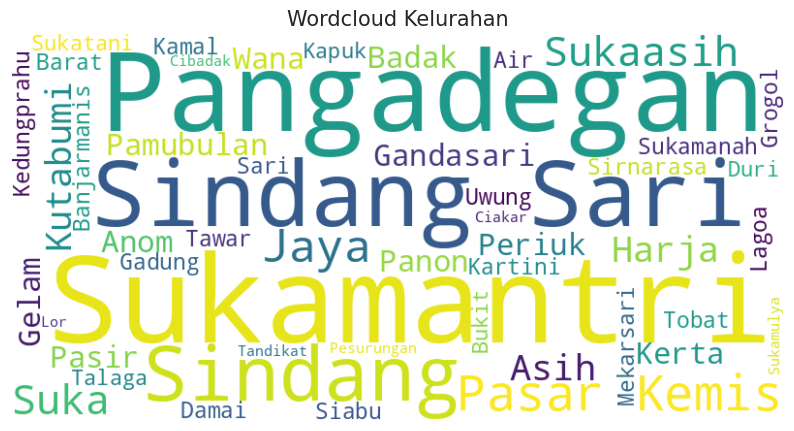

In [55]:
#Menggabungkan semua nama menjadi satu teks
text=' '.join(df['Kelurahan'].tolist())

#Membuat wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

#Menampilkan wordcloud
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud Kelurahan', fontsize=15)
plt.show()

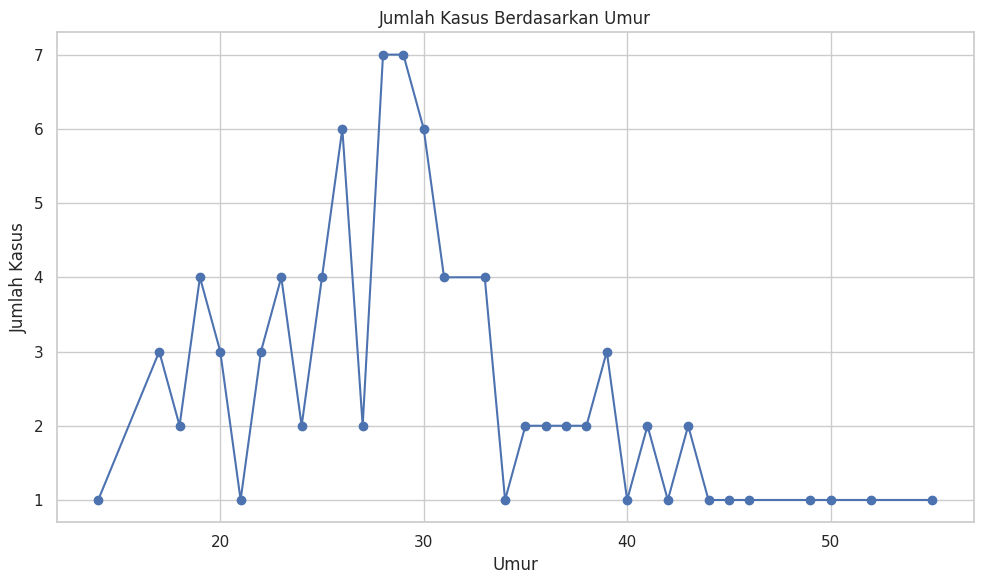

In [56]:
# Menghitung jumlah kasus berdasarkan umur
umur_counts = df['Umur'].value_counts().sort_index()

# Membuat grafik garis
plt.figure(figsize=(10, 6))
plt.plot(umur_counts.index, umur_counts.values, marker='o', linestyle='-')
plt.title('Jumlah Kasus Berdasarkan Umur')
plt.xlabel('Umur')
plt.ylabel('Jumlah Kasus')
plt.grid(True)
plt.tight_layout()
plt.show()

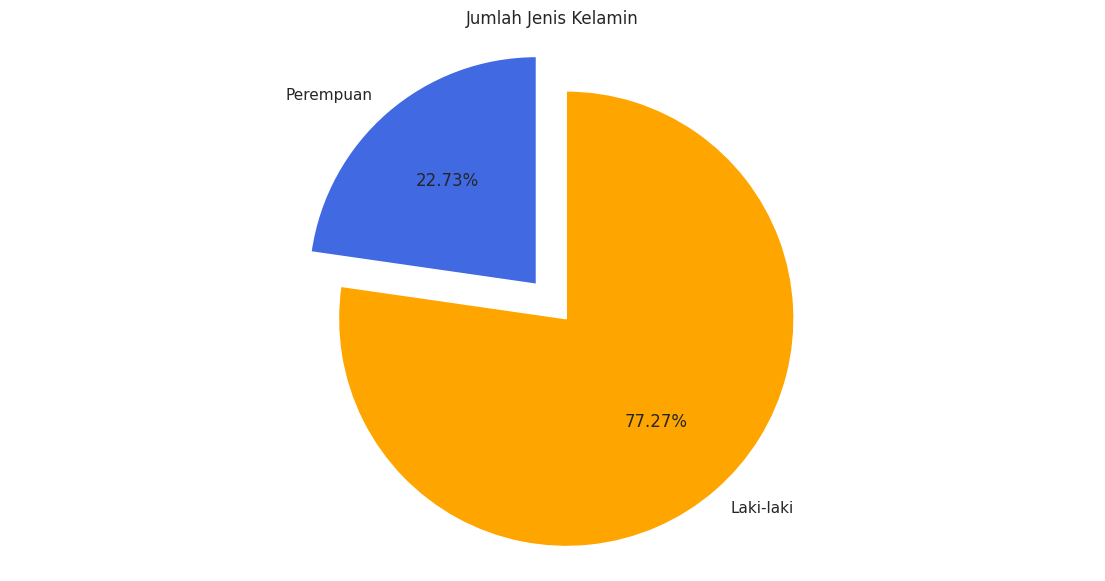

In [57]:
#Grafik Pei (Diagram Lingkaran)
plt.figure(figsize=(14, 7))
labels=['Perempuan','Laki-laki']
plt.pie(df['Jenis Kelamin'].value_counts().sort_values(),labels=labels,explode=[0.1,0.1],
        autopct='%1.2f%%',colors=['royalblue','orange'],startangle=90)
plt.title('Jumlah Jenis Kelamin')
plt.axis('equal')
plt.show()

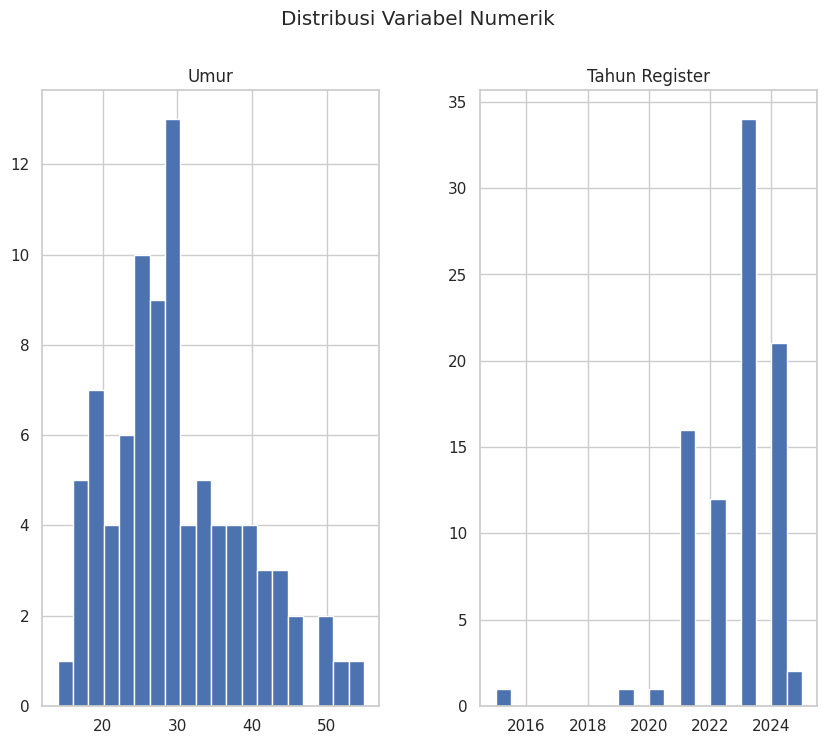

In [58]:
#Analisis Distribusi dan Korelasi

# Visualisasi distribusi variabel numerik
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols].hist(bins=20, figsize=(10, 8))
plt.suptitle("Distribusi Variabel Numerik")
plt.show()

<ipython-input-59-439a574780cc>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


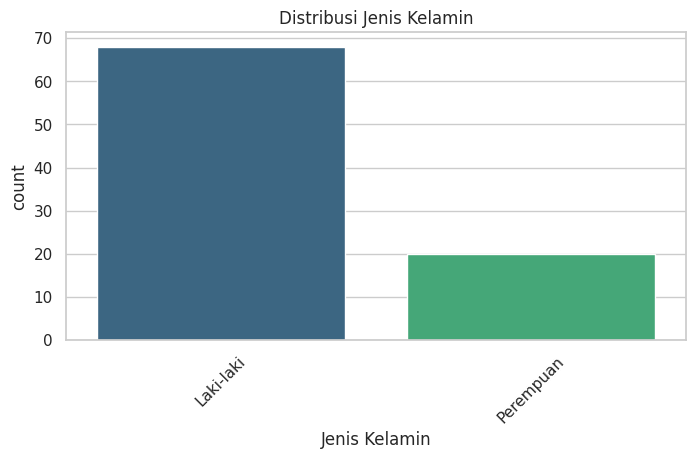

<ipython-input-59-439a574780cc>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


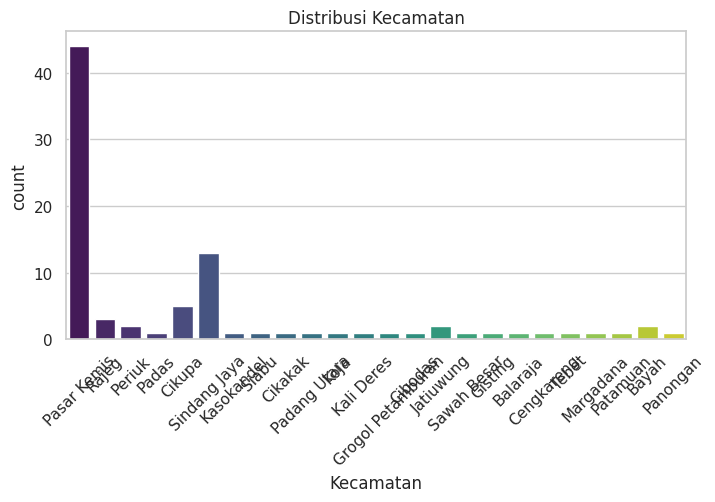

<ipython-input-59-439a574780cc>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


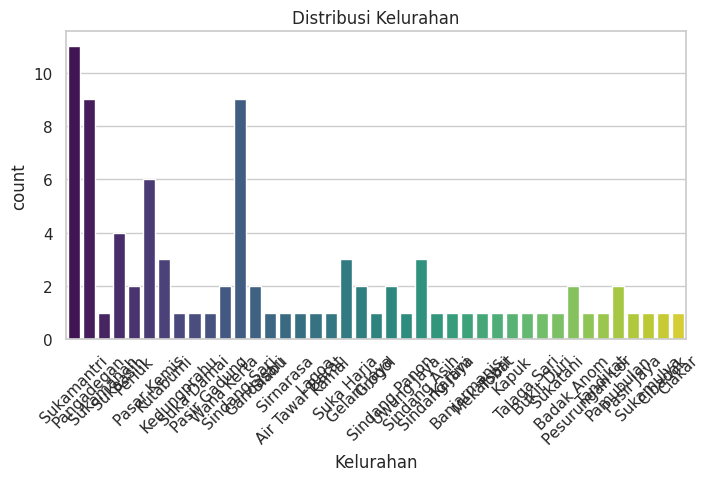

<ipython-input-59-439a574780cc>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis')


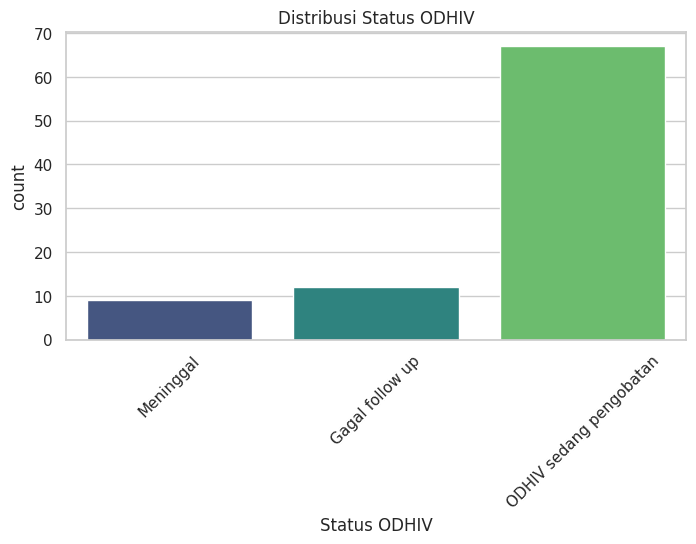

In [59]:
# Visualisasi distribusi variabel kategorikal
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df, palette='viridis')
    plt.title(f"Distribusi {col}")
    plt.xticks(rotation=45)
    plt.show()

#3. DATA PREPARATION#

In [60]:
# Cek Redudansi/Duplikasi data
df.duplicated().sum()

np.int64(2)

In [61]:
# Menghapus Redudansi/Duplikasi
df.drop_duplicates(inplace=True)

In [62]:
#mengecek dan menampilkan kolom atau baris mana saja dalam DataFrame yang memiliki missing values

# Cek Missing Value
def cek_null(df):
    col_na = df.isnull().sum().sort_values(ascending=False)
    percent = col_na / len(df)

    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total','Percent'])
    print(missing_data[missing_data['Total'] > 0])

In [63]:
#Untuk menampilkan hasil dari function
cek_null(df)

Empty DataFrame
Columns: [Total, Percent]
Index: []


In [64]:
#Encoding Data kategorikal (mengubah data teks menjadi numerik)

# Membuat objek LabelEncoder untuk melakukan proses encoding
label_encoder = LabelEncoder()

# Melakukan iterasi untuk setiap kolom yang bertipe object (string/teks) dalam dataframe
for column in df.select_dtypes(include=[object]).columns:
    # Mengubah nilai kategorikal menjadi numerik menggunakan fit_transform
    # fit_transform akan:
    # 1. Mempelajari kategori unik dalam kolom (fit)
    # 2. Mengubah setiap kategori menjadi angka (transform)
    # Contoh: 'Yes' -> 1, 'No' -> 0
    df[column] = label_encoder.fit_transform(df[column])

In [65]:
# Dataset setelah preprocessing
df.head()

,Umur,Jenis Kelamin,Kecamatan,Kelurahan,Tahun Register,Status ODHIV
0,45,0,16,33,2023,1
1,17,1,16,17,2020,0
2,37,0,16,17,2021,2
3,28,1,16,17,2021,2
4,39,0,19,32,2021,2


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86 entries, 0 to 87
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Umur            86 non-null     int64
 1   Jenis Kelamin   86 non-null     int64
 2   Kecamatan       86 non-null     int64
 3   Kelurahan       86 non-null     int64
 4   Tahun Register  86 non-null     int64
 5   Status ODHIV    86 non-null     int64
dtypes: int64(6)
memory usage: 4.7 KB


In [67]:
#Normalisasi atau Standarisasi Fitur

# Standarisasi (mean=0, std=1)
scaler = StandardScaler()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Alternatif: Normalisasi (rentang 0-1)
# scaler = MinMaxScaler()
# data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

print("\nData setelah Standarisasi:")
print(df[numerical_cols].head())


Data setelah Standarisasi:
       Umur  Jenis Kelamin  Kecamatan  Kelurahan  Tahun Register  Status ODHIV
0  1.699551      -0.550482   0.195062   1.053656        0.272848     -0.858307
1 -1.515311       1.816590   0.195062  -0.477316       -1.797588     -2.251031
2  0.781019      -0.550482   0.195062  -0.477316       -1.107443      0.534417
3 -0.252329       1.816590   0.195062  -0.477316       -1.107443      0.534417
4  1.010652      -0.550482   0.724809   0.957970       -1.107443      0.534417


#Modeling


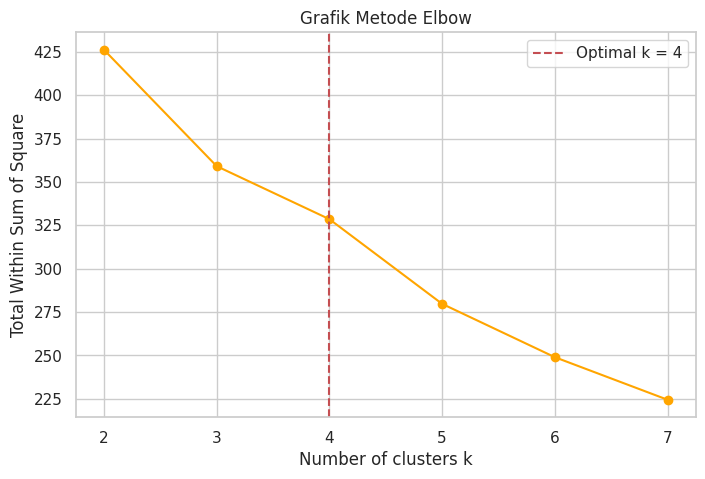

In [68]:
# K-Means Clustering
# 1. Elbow Method -> untuk menentukan jumlah cluster optimal.

# Data numerik untuk clustering
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
X = df[numerical_cols]

# Tentukan jumlah cluster yang diuji (misalnya, 2-10)
inertia = []
k_range = range(2, 8)

# Iterasi melalui jumlah cluster
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Membuat grafik Elbow
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', color='orange')
plt.title('Grafik Metode Elbow')
plt.xlabel('Number of clusters k')
plt.ylabel('Total Within Sum of Square')
plt.xticks(k_range)
plt.grid(True)

# Menandai "elbow" point (secara visual, mungkin tidak otomatis)
# Berdasarkan grafik contoh, elbow terlihat di k=4
elbow_point = 4
plt.axvline(x=elbow_point, color='r', linestyle='--', label=f'Optimal k = {elbow_point}')
plt.legend()
plt.show()

In [69]:
# Lakukan penskalaan (kemungkinan data sudah diskalakan seperti terlihat dari nilai negatif)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Menjalankan K-Means Clustering ke dataset
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Fitur-fitur yang akan digunakan untuk clustering
features = X.columns

# Analisis hasil clustering
print(f"K-means clustering with {n_clusters} clusters of sizes:")
print(df['Cluster'].value_counts().sort_index().to_dict())

print("\nCluster means:")
cluster_means = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=features)
print(cluster_means)

print("\nWithin cluster sum of squares by cluster:")
inertia_per_cluster = {}
for i in range(n_clusters):
    cluster_data = X_scaled[df['Cluster'] == i]
    inertia_per_cluster[i + 1] = np.sum((cluster_data - kmeans.cluster_centers_[i])**2)
print(inertia_per_cluster)

total_inertia = kmeans.inertia_
between_inertia = np.sum(np.sum((kmeans.cluster_centers_ - np.mean(X_scaled, axis=0))**2, axis=1) * df['Cluster'].value_counts().sort_index())
proportion_explained = (between_inertia / (total_inertia + between_inertia)) * 100
print(f"\n(between_SS / total_SS = {proportion_explained:.1f} %)")

print(f"\nTotal Within Sum of Squares (tot.withinss): {total_inertia:.2f}")
print(f"Between-Cluster Sum of Squares (betweenss): {between_inertia:.2f}")

K-means clustering with 4 clusters of sizes:
{0: 22, 1: 22, 2: 24, 3: 18}

Cluster means:
       Umur  Jenis Kelamin  Kecamatan  Kelurahan  Tahun Register  Status ODHIV
0 -0.701157      -0.550482  -0.134023   0.697009        0.398329      0.534417
1  0.133872      -0.335294   0.010453   0.201183       -0.636889     -1.301446
2  0.269129      -0.550482  -0.077169  -0.883981        0.071556      0.534417
3  0.334511       1.816590   0.253923   0.080851        0.196165      0.224923

Within cluster sum of squares by cluster:
{1: np.float64(45.51592348146849), 2: np.float64(146.66795110105403), 3: np.float64(73.2929959516824), 4: np.float64(63.05555915010245)}

(between_SS / total_SS = 36.3 %)

Total Within Sum of Squares (tot.withinss): 328.53
Between-Cluster Sum of Squares (betweenss): 187.47


# Proses Clustering

In [74]:
# Menjalankan K-Means Clustering ke dataset
n_clust = 4
kmeans = KMeans(n_clusters=n_clust).fit(df) #Memanggil fungsi K-Means
df['Labels']=kmeans.labels_

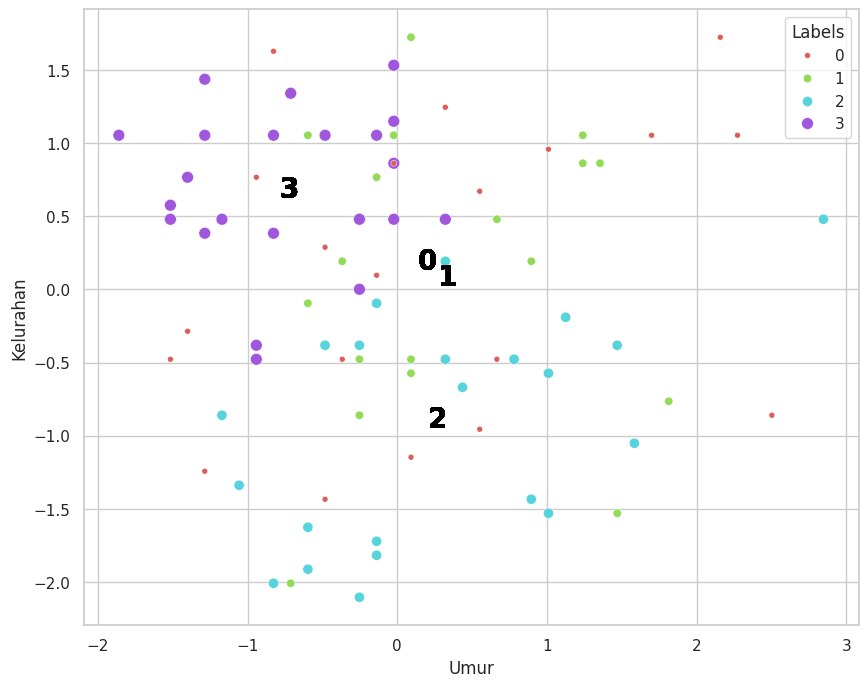

In [75]:
# Visualisasi hasil clusters Scatter Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Umur', y='Kelurahan', hue='Labels', data=df, markers=True,
                   size='Labels', palette=sns.color_palette('hls', n_clust))

for label in df['Labels']:
     plt.annotate(label,
               (df[df['Labels']==label]['Umur'].mean(),
                df[df['Labels']==label]['Kelurahan'].mean()),
               horizontalalignment ='center',
               verticalalignment ='center',
               size = 20, weight='bold',
               color ='black')

#Evaluasi

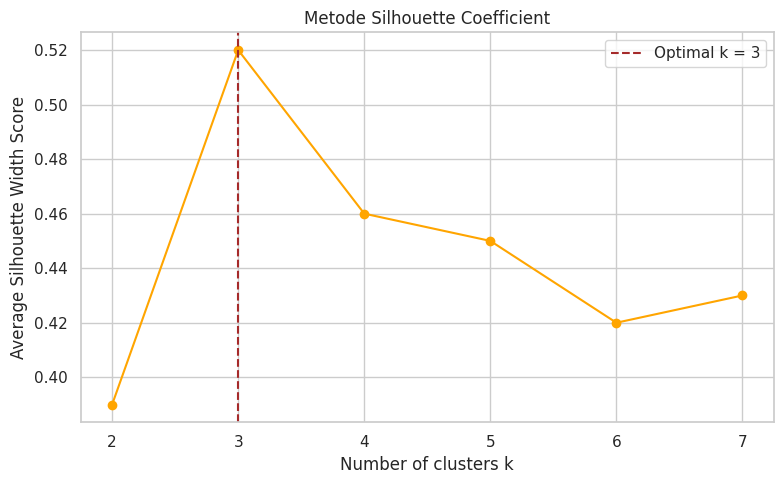

In [78]:
# 2. Silhouette Score -> sebagai ukuran kualitas cluster.

# Preprocessing (Scaling)
X, y = make_blobs(n_samples=40, cluster_std=1.00, random_state=0)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduksi dimensi dengan PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Clustering dan evaluasi silhouette score untuk berbagai jumlah cluster
silhouette_scores_rounded = []
k_values = range(2, 8) # Dimulai dari 2 karena 1 cluster tidak memiliki makna
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    silhouette_scores_rounded.append(round(score, 2)) # Bulatkan skor di sini

# Visualisasi Plot hasil
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores_rounded, marker='o', color='orange')
plt.title('Metode Silhouette Coefficient')
plt.xlabel('Number of clusters k')
plt.ylabel('Average Silhouette Width Score')
plt.grid(True)

# Menandai titik optimal (berdasarkan nilai tertinggi)
optimal_k_index = silhouette_scores_rounded.index(max(silhouette_scores_rounded))
optimal_k = k_values[optimal_k_index]
plt.axvline(x=optimal_k, color='brown', linestyle='--', label=f'Optimal k = {optimal_k}')
plt.legend()

# Menampilkan Grafik
plt.tight_layout()
plt.show()